In [4]:
import torch
import torch.utils.data as data
import cv2
import os
from glob import glob

In [5]:
root = './data/train'
img_files = glob(os.path.join(root,'image','*.png'))
basename = os.path.basename(img_files[0])
print(basename)

cmr72.png


In [6]:
import torch
import torch.utils.data as data
import cv2
import os
from glob import glob

class TrainDataset(data.Dataset):
    def __init__(self, root=''):
        super(TrainDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))
        self.mask_files = []
        for img_path in self.img_files:
            basename = os.path.basename(img_path)
            self.mask_files.append(os.path.join(root,'mask',basename[:-4]+'_mask.png'))
        # get the path of these images  

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            label = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float(), torch.from_numpy(label).float()
            #change it from numpy to tesnor

    def __len__(self):
        return len(self.img_files)
        # how many train images

class TestDataset(data.Dataset):
    def __init__(self, root=''):
        super(TestDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float()

    def __len__(self):
        return len(self.img_files)

In [7]:
data_path = './test_data/train'
train_set = TrainDataset(data_path)

In [8]:
from matplotlib import pyplot as plt
def show_image_mask(img, mask, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')

In [10]:
from torch.utils.data import DataLoader
num_workers = 4
batch_size = 4
data_path = './data/train'
train_set = TrainDataset(data_path)
training_data_loader = DataLoader(dataset=train_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)
num_epochs = 2

# for epoch in range(num_epochs):
for iteration, sample in enumerate(training_data_loader):
    img, mask = sample

#     show_image_mask(img[0], mask[0]) 
    #visualise all data in training set
        



In [17]:
from matplotlib import pyplot as plt
def show_image_mask(img, mask, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')

(96, 96)


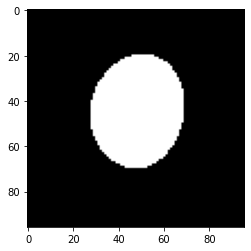

In [12]:
import os
import cv2 #import OpenCV
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

data_dir = './data/test'
image =cv2.imread(os.path.join(data_dir,'image','cmr101.png'), cv2.IMREAD_UNCHANGED)
mask = cv2.imread(os.path.join(data_dir,'mask','cmr128_mask.png'), cv2.IMREAD_UNCHANGED)

print(mask.shape)
# cv2.imwrite(os.path.join('./','cmr1.png'), mask*85)
# show_image_mask(image, mask, cmap='gray')
# plt.pause(1)
plt.imshow(mask, cmap='gray')
plt.show()